In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import scipy
from sklearn import datasets
import matplotlib
%matplotlib inline

In [2]:
iris_dataset = datasets.load_iris()
#iris_dataset

## import csv

In [3]:
def import_df(location):
    csv = pd.read_csv(location)
    return csv

In [4]:
iris_dataset_csv = import_df("iris-data.csv")
iris_dataset_csv.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## analyze csv

In [5]:
iris_dataset_csv["class"].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [6]:
iris_dataset_csv.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


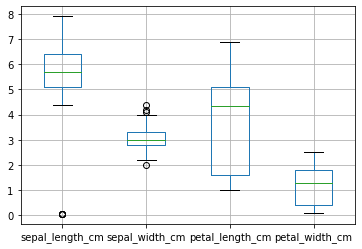

In [7]:
iris_dataset_csv.boxplot();

In [8]:
iris_dataset_csv.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [9]:
null_values_petal_width = iris_dataset_csv[iris_dataset_csv["petal_width_cm"].isnull()]
null_values_petal_width

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [10]:
mean_iris_setosa = iris_dataset_csv[iris_dataset_csv["class"]=="Iris-setosa"]["petal_width_cm"].mean()
mean_iris_setosa

0.25

# EDA

## Standarize the name of the specie and also define the target as a new column 

In [11]:
def add_target(df, new_column, old_column):
    
    def iris_target(column):
        if "etos" in column:
            return "setosa"
        elif "ersicolo" in column:
            return "versicolor"
        elif "irgini" in column:
            return "virginica"
        else:
            return "non_value"
    
    df[new_column] = df[old_column].apply(iris_target)
    return "new column created successfully"

In [12]:
add_target(iris_dataset_csv, "iris_target", "class")

'new column created successfully'

In [13]:
iris_dataset_csv.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,iris_target
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa


In [14]:
iris_dataset_csv["iris_target"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## fix missing values

In [15]:
def fix_missing_values(df, class_value, column):
    mean_column = df[df["class"]==class_value][column].mean()
    df[column] = df[column].fillna(mean_column)
    return "missing value fixed"

In [16]:
def fix_all_sizes():
    fix_missing_values(iris_dataset_csv, "Iris-setosa", "sepal_width_cm")
    fix_missing_values(iris_dataset_csv, "Iris-setosa", "petal_length_cm")
    fix_missing_values(iris_dataset_csv, "Iris-setosa", "petal_width_cm")

    fix_missing_values(iris_dataset_csv, "Iris-setossa", "sepal_length_cm")
    fix_missing_values(iris_dataset_csv, "Iris-setossa", "sepal_width_cm")
    fix_missing_values(iris_dataset_csv, "Iris-setossa", "petal_length_cm")
    fix_missing_values(iris_dataset_csv, "Iris-setossa", "petal_width_cm")

    fix_missing_values(iris_dataset_csv, "Iris-versicolor", "sepal_length_cm")
    fix_missing_values(iris_dataset_csv, "Iris-versicolor", "sepal_width_cm")
    fix_missing_values(iris_dataset_csv, "Iris-versicolor", "petal_length_cm")
    fix_missing_values(iris_dataset_csv, "Iris-versicolor", "petal_width_cm")

    fix_missing_values(iris_dataset_csv, "versicolor", "sepal_length_cm")
    fix_missing_values(iris_dataset_csv, "versicolor", "sepal_width_cm")
    fix_missing_values(iris_dataset_csv, "versicolor", "petal_length_cm")
    fix_missing_values(iris_dataset_csv, "versicolor", "petal_width_cm")

    fix_missing_values(iris_dataset_csv, "Iris-virginica", "sepal_length_cm")
    fix_missing_values(iris_dataset_csv, "Iris-virginica", "sepal_width_cm")
    fix_missing_values(iris_dataset_csv, "Iris-virginica", "petal_length_cm")
    fix_missing_values(iris_dataset_csv, "Iris-virginica", "petal_width_cm")
    return "all missing value fixed"

fix_all_sizes()

'all missing value fixed'

In [17]:
iris_dataset_csv.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
iris_target        0
dtype: int64

In [18]:
iris_dataset_csv.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,iris_target
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa


## Encoding variables

### only one target colum - UNILABEL

In [19]:
iris_dataset_csv.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
iris_target         object
dtype: object

In [20]:
def encoding_variable(df, column_to_categorized, new_columns_name):
    df[column_to_categorized] = df[column_to_categorized].astype('category')
    df[new_columns_name] = df[column_to_categorized].cat.codes
    print("column categorized")
    return df

In [21]:
iris_dataset_csv_categorized = encoding_variable(iris_dataset_csv, "iris_target", "iris_target_cat")
iris_dataset_csv_categorized.head()

column categorized


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,iris_target,iris_target_cat
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa,0


In [22]:
#make a copy
iris_dataset_csv = iris_dataset_csv_categorized.copy()

## drop columns

In [23]:
"""must be class and iris_target"""

'must be class and iris_target'

In [24]:
def delete_column(df, column_name):
    del df[column_name]
    return "column deleted"

In [25]:
delete_column(iris_dataset_csv_categorized, "class")
delete_column(iris_dataset_csv_categorized, "iris_target")

'column deleted'

In [26]:
iris_dataset_csv_categorized.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_target_cat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
iris_dataset_csv_categorized.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
iris_target_cat       int8
dtype: object

#  LAB FINISHED

### * EXTRA MIO: Encoding variables - get_dummmies (CLASIFICACIÓN --> MULTILABEL)


In [30]:
categorical_target = pd.get_dummies(iris_dataset_csv["iris_target"])
categorical_target.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [31]:
iris_dataset_csv_to_merge = iris_dataset_csv.reset_index(drop=False)
categorical_target_to_merge = categorical_target.reset_index(drop=False)

In [32]:
final_df_merged = pd.merge(iris_dataset_csv_to_merge, categorical_target_to_merge, how='outer', on="index").set_index("index").reset_index(drop=True)
final_df_merged.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,iris_target,iris_target_cat,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa,0,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa,0,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa,0,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa,0,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa,0,1,0,0


In [33]:
# another opction could be with concat()
# pd.concat([iris_dataset_csv,categorical_target], axis=1)

In [34]:
delete_column(final_df_merged, "class")
delete_column(final_df_merged, "iris_target")
delete_column(final_df_merged, "iris_target_cat")

'column deleted'

In [35]:
final_df_merged.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
